In [1]:
import scrape
import pandas as pd
import os
import numpy as np
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium import webdriver

options = Options()
options.headless = True
service = Service(executable_path="chromium.chromedriver")
driver = webdriver.Chrome(options=options, service=service)

%load_ext autoreload
%autoreload 2

In [2]:
Service(executable_path="chromium.chromedriver")

In [2]:
class Parent:
    def twice(self):
        self.message()
        self.message()
        
    def message(self):
        print("parent says hi")
        
class Child(Parent):
    def message(self):
        print("child says hi")
        
c = Child()


In [3]:
c.twice()

child says hi
child says hi


In [4]:
class GraphSearcher:
    def __init__(self):
        self.visited = set()
        self.order = []

    def visit_and_get_children(self, node):
        """ Record the node value in self.order, and return its children
        param: node
        return: children of the given node
        """
        raise Exception("must be overridden in sub classes -- don't change me here!")

    def dfs_search(self, node):
        self.visited.clear()
        self.order.clear()
        self.dfs_visit(node)
        # 1. clear out visited set and order list
        # 2. start recursive search by calling dfs_visit

    def dfs_visit(self, node):
        if node in self.visited:
            return
        self.visited.add(node)
        for child in self.visit_and_get_children(node):
            self.dfs_visit(child)
        # 1. if this node has already been visited, just `return` (no value necessary)
        # 2. mark node as visited by adding it to the set
        # 3. call self.visit_and_get_children(node) to get the children
        # 4. in a loop, call dfs_visit on each of the children


In [5]:
g = scrape.GraphSearcher()
g.dfs_search("A")


Exception: must be overridden in sub classes -- don't change me here!

In [2]:
df = pd.DataFrame([
    [0,1,0,1],
    [0,0,1,0],
    [0,0,0,1],
    [0,0,1,0],
], index=["A", "B", "C", "D"], columns=["A", "B", "C", "D"])
df


,A,B,C,D
A,0,1,0,1
B,0,0,1,0
C,0,0,0,1
D,0,0,1,0


In [3]:
for node, has_edge in df.loc["B"].items():
    if has_edge == 1:
        print(node)


C


In [7]:
class MatrixSearcher(GraphSearcher):
    def __init__(self, df):
        super().__init__() # call constructor method of parent class
        self.df = df

    def visit_and_get_children(self, node):
        # TODO: Record the node value in self.order
        self.order.append(node)
        children = []
        # TODO: use `self.df` to determine what children the node has and append them
        for child_node, has_edge in self.df.loc[node].items():
            if has_edge == 1:
                children.append(child_node)
        return children


NameError: name 'GraphSearcher' is not defined

In [4]:
m = scrape.MatrixSearcher(df)
m.dfs_search("A")
m.order


['A', 'B', 'C', 'D']

In [5]:
df = pd.DataFrame([
    [0,1,1,0],
    [0,0,0,1],
    [0,0,0,1],
    [0,0,1,0],
], index=["A", "B", "C", "D"], columns=["A", "B", "C", "D"])

m = scrape.MatrixSearcher(df)
m.bfs_search("A")
m.order


['A', 'B', 'C', 'D']

In [6]:
f = scrape.FileSearcher()
print(f.visit_and_get_children("1.txt"), f.order, f.concat_order())

['2.txt', '5.txt'] ['M'] M


In [7]:
ts = scrape.WebSearcher(driver)

In [8]:
ts.chrome_driver.get("http://104.198.36.123:5000/") 

In [9]:
#div = ts.chrome_driver.find_elements("tag name", "div")
#h3s = div[0].find_elements("tag name", "h3")
a_elements = ts.chrome_driver.find_elements("tag name", "a")
for a_element in a_elements:
    print(a_element.text, a_element.get_attribute("href"))


TRAVEL HISTORY http://104.198.36.123:5000/Node_1.html
Enter the passcode and press go. None
Password: None


In [10]:
ws = scrape.WebSearcher(driver)

In [11]:
ws.chrome_driver.get("http://104.198.36.123:5000/Node_1.html")

In [12]:
tbls = ws.chrome_driver.find_elements("tag name", "table")

clue_table = tbls[0]
links_table = tbls[1]
clue_table_rows = clue_table.find_elements("tag name", "tr")
table = []
for tr in clue_table_rows:
    if tr == clue_table_rows[0]:
        rows = []
        ths = tr.find_elements("tag name", "th")
        for th in ths:
            rows.append(th.text)
        table.append(rows)
        
    else:
        rows = []
        tds = tr.find_elements("tag name", "td")
        for td in tds:
            rows.append(td.text)
        table.append(rows)
        
    
table

[['clue', 'latitude', 'longitude', 'description'],
 ['8', '51.180315', '-1.829659', 'Stonehenge in the UK'],
 ['2', '27.987586', '86.925002', 'Mt. Everest in Nepal']]

In [13]:
links_table = tbls[1]
links_table_rows = links_table.find_elements("tag name", "tr")
table = []
for tr in links_table_rows:
    rows = []
    ths = tr.find_elements("tag name", "th")
    for th in ths:
        table.append(th.text)
        

        
    
table

['Page 2', 'Page 5']

In [14]:
a_elements = ws.chrome_driver.find_elements("tag name", "a")
for a_element in a_elements:
    print(a_element.text, a_element.get_attribute("href"))

Page 2 http://104.198.36.123:5000/Node_2.html
Page 5 http://104.198.36.123:5000/Node_5.html


In [2]:
import os
os.system("pkill -f -9 chromium")


9

In [2]:
os.system("pkill -f -9 chromium")

options = Options()
options.headless = True
service = Service(executable_path="chromium.chromedriver")
driver = webdriver.Chrome(options=options, service=service)

# TODO: use IP address of your VM
start_url = "http://104.198.36.123:5000/Node_1.html"

s = scrape.WebSearcher(driver)
print(s.visit_and_get_children(start_url))

s = scrape.WebSearcher(driver)
s.bfs_search(start_url)


print(s.table())

driver.close()


['http://104.198.36.123:5000/Node_2.html', 'http://104.198.36.123:5000/Node_5.html']
    clue   latitude   longitude                          description
0      8  51.180315   -1.829659                 Stonehenge in the UK
1      2  27.987586   86.925002                 Mt. Everest in Nepal
2      4  34.134117 -118.321495                 Hollywood Sign in LA
3      5  38.655100   90.061800                 Cahokia Mounds in IL
4      9  40.748400   73.985700          Empire State Building in NY
5      4  29.975300   31.137600        Great Sphinx of Giza in Egypt
6      8  35.360600  138.727400                  Mount Fiji in Japan
7      0  27.175100   78.042100               The Taj Mahal in India
8      9  51.503200   -0.119500                       The London Eye
9      1  47.557600   10.749800     Neuschwanstein Castle in Germany
10     5  38.624700   90.184800        The Gateway Arch in St. Louis
11     3  30.328500   35.444400                      Petra in Jordan
12     2  41.48080

In [4]:
s.order


['http://104.198.36.123:5000/Node_1.html',
 'http://104.198.36.123:5000/Node_2.html',
 'http://104.198.36.123:5000/Node_5.html',
 'http://104.198.36.123:5000/Node_3.html',
 'http://104.198.36.123:5000/Node_6.html',
 'http://104.198.36.123:5000/Node_4.html',
 'http://104.198.36.123:5000/Node_7.html']

In [45]:
t.order

['http://104.198.36.123:5000/Node_1.html',
 'http://104.198.36.123:5000/Node_2.html',
 'http://104.198.36.123:5000/Node_5.html',
 'http://104.198.36.123:5000/Node_3.html',
 'http://104.198.36.123:5000/Node_4.html',
 'http://104.198.36.123:5000/Node_7.html',
 'http://104.198.36.123:5000/Node_6.html']

In [3]:
df = s.table()
df

,clue,latitude,longitude,description
0,8,51.180315,-1.829659,Stonehenge in the UK
1,2,27.987586,86.925002,Mt. Everest in Nepal
2,4,34.134117,-118.321495,Hollywood Sign in LA
3,5,38.655100,90.061800,Cahokia Mounds in IL
4,9,40.748400,73.985700,Empire State Building in NY
5,4,29.975300,31.137600,Great Sphinx of Giza in Egypt
6,8,35.360600,138.727400,Mount Fiji in Japan
7,0,27.175100,78.042100,The Taj Mahal in India
8,9,51.503200,-0.119500,The London Eye
9,1,47.557600,10.749800,Neuschwanstein Castle in Germany


In [8]:
password = "".join(df["clue"].astype(str))
type(password) # the password

str

In [6]:
from IPython.display import display, Image 
import time
def show_screen(width, height):
    driver.save_screenshot("out.png")
    driver.set_window_size(width, height)
    display(Image("out.png"))

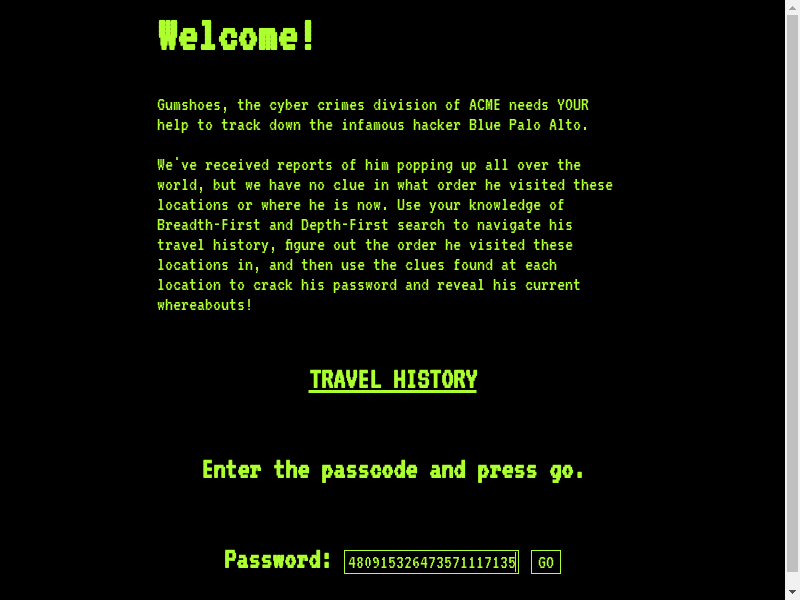

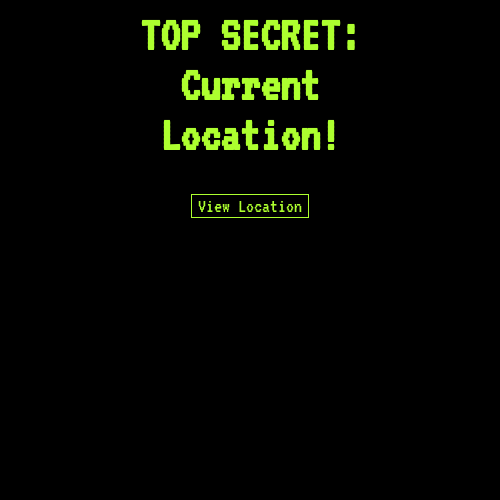

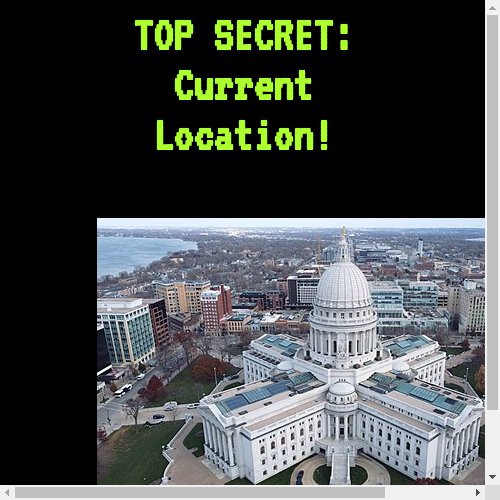

STATE CAPITOL


In [9]:
options = Options()
options.headless = True
service = Service(executable_path="chromium.chromedriver")
driver = webdriver.Chrome(options=options, service=service)
driver.get("http://104.198.36.123:5000/")
text = driver.find_element("id", "password-textbox")
button = driver.find_element("id", "submit-button")

text.send_keys(password)
show_screen(500,500)

button.click()
show_screen(500,500)

time.sleep(3)

button = driver.find_element("id", "view-location-button")
button.click()
time.sleep(3)
show_screen(500,500)

text = driver.find_element("id", "location")
print(text.text)

In [12]:
ind_points = 0
port = "5000"

options = Options()
options.headless = True
service = Service(executable_path="chromium.chromedriver")
driver = webdriver.Chrome(options=options, service=service)

if os.path.exists("Current_Location.jpg"):
    os.remove("Current_Location.jpg")

location = scrape.reveal_secrets(driver, "http://104.198.36.123:5000/", expected_bfs_travellog)
ind_points += 5

assert location == 'STATE CAPITOL'
ind_points += 10

assert os.path.exists("Current_Location.jpg")
ind_points += 5

with open("Current_Location.jpg", "rb") as f:      
    assert len(f.read()) == 63413
ind_points += 5

ind_points

25

In [8]:
import pandas as pd
expected_bfs_travellog =  pd.read_csv("part3.csv")

In [10]:
web_points = 0
port = 5000

ws = scrape.WebSearcher(driver)
url = f"http://localhost:{port}/Node_1.html"
assert ws.visit_and_get_children(url) == [
    f"http://localhost:{port}/Node_2.html",
    f"http://localhost:{port}/Node_5.html",
]
web_points += 5

ws = scrape.WebSearcher(driver)
ws.bfs_search(url)
assert ws.order == [
    f"http://localhost:{port}/Node_1.html",
    f"http://localhost:{port}/Node_2.html",
    f"http://localhost:{port}/Node_5.html",
    f"http://localhost:{port}/Node_3.html",
    f"http://localhost:{port}/Node_6.html",
    f"http://localhost:{port}/Node_4.html",
    f"http://localhost:{port}/Node_7.html",
]
web_points += 5
actual = ws.table()
expected = expected_bfs_travellog

# how much overlap was there between the clues?
both = len(set(expected["clue"]).intersection(actual["clue"]))
either = len(set(expected["clue"]).union(actual["clue"]))
web_points += int(both / either * 10)

# did everything match?
assert expected.shape == actual.shape
assert (expected.reset_index() == actual.reset_index()).all().all()
web_points += 5
web_points

25